In [19]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [20]:
df =pd.read_csv('../Data_CSVs/Real_Data.csv')
df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,-0.143430,0.054564,0.447007,1.517822,1.065329,-0.363612,0.689104,-0.533509,1.329823,1.379429,...,4.726695,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,1.754538
1,0.471923,-1.595458,0.447007,-0.465347,0.569680,-0.705530,-0.212300,-0.611236,-0.172942,-0.606353,...,-0.211564,-0.118899,-0.126508,-1.059427,-0.742863,5.215915,-0.178149,-0.227948,0.718519,-0.941343
2,-0.143430,0.009894,0.447007,1.044566,0.754969,-0.192653,0.989572,-0.241446,0.753181,1.103626,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,-0.941343
3,0.471923,-1.592666,0.447007,0.180685,0.880039,-0.534571,0.388636,-1.482715,0.526019,-0.096117,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,0.855911
4,-1.064986,-0.336304,0.447007,-0.082235,0.768866,-0.363612,-0.813236,-0.241446,0.543493,-0.316760,...,-0.211564,-0.118899,-0.126508,-1.059427,1.346143,-0.191721,-0.178149,-0.227948,1.254024,-0.941343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21516,-0.370138,0.272334,0.746790,9.555667,-0.055671,0.320223,1.290039,-0.241446,2.727743,-0.604974,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,-0.941343
21517,-0.143430,-0.079448,-0.452342,32.317043,0.768866,2.200769,3.393315,-0.900944,5.523583,-0.569119,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,0.855911
21518,1.841008,0.107611,0.746790,10.569788,-1.153509,1.516934,-0.212300,-0.241446,2.028783,-0.602147,...,-0.211564,-0.118899,-0.126508,-1.059427,1.346143,-0.191721,-0.178149,-0.227948,1.254024,0.855911
21519,-0.370138,-1.017532,0.746790,16.331496,-0.055671,2.542687,-0.212300,0.222558,3.164593,-0.593486,...,-0.211564,-0.118899,-0.126508,-1.059427,-0.742863,-0.191721,5.613293,-0.227948,-0.352491,0.855911


In [24]:
y= df ['totalyearlycompensation']
X = df.drop(columns= ['totalyearlycompensation'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape).

(17216, 27) (4305, 27) (17216,) (4305,)


In [28]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3584      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 168,449
Trainable params: 168,449
Non-trainable params: 0
_________________________________________________________________


In [52]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [32]:

history =NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100
431/431 [==============================] - ETA: 0s - loss: 0.0153 - mean_absolute_error: 0.0153
Epoch 1: val_loss did not improve from 0.00627
431/431 [==============================] - 3s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113
Epoch 2/100
428/431 [============================>.] - ETA: 0s - loss: 0.0150 - mean_absolute_error: 0.0150
Epoch 2: val_loss did not improve from 0.00627
431/431 [==============================] - 3s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098
Epoch 3/100
431/431 [==============================] - ETA: 0s - loss: 0.0152 - mean_absolute_error: 0.0152
Epoch 3: val_loss did not improve from 0.00627
431/431 [==============================] - 3s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083
Epoch 4/100
427/431 [============================>.] - ETA: 0s - loss: 0.014

431/431 [==============================] - 4s 10ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097
Epoch 28/100
431/431 [==============================] - ETA: 0s - loss: 0.0137 - mean_absolute_error: 0.0137
Epoch 28: val_loss did not improve from 0.00627
431/431 [==============================] - 4s 9ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074
Epoch 29/100
430/431 [============================>.] - ETA: 0s - loss: 0.0145 - mean_absolute_error: 0.0145
Epoch 29: val_loss did not improve from 0.00627
431/431 [==============================] - 6s 13ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073
Epoch 30/100
429/431 [============================>.] - ETA: 0s - loss: 0.0143 - mean_absolute_error: 0.0143
Epoch 30: val_loss did not improve from 0.00627
431/431 [==============================] - 6s 13ms/step - loss: 0.01

428/431 [============================>.] - ETA: 0s - loss: 0.0138 - mean_absolute_error: 0.0138
Epoch 53: val_loss did not improve from 0.00545
431/431 [==============================] - 3s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116
Epoch 54/100
427/431 [============================>.] - ETA: 0s - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 54: val_loss did not improve from 0.00545
431/431 [==============================] - 3s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080
Epoch 55/100
421/431 [============================>.] - ETA: 0s - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 55: val_loss did not improve from 0.00545
431/431 [==============================] - 5s 11ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058
Epoch 56/100
425/431 [============================>.] - ETA: 0s - loss: 0.0137 - m

431/431 [==============================] - 4s 9ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076
Epoch 80/100
428/431 [============================>.] - ETA: 0s - loss: 0.0136 - mean_absolute_error: 0.0136
Epoch 80: val_loss did not improve from 0.00545
431/431 [==============================] - 4s 10ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066
Epoch 81/100
429/431 [============================>.] - ETA: 0s - loss: 0.0130 - mean_absolute_error: 0.0130
Epoch 81: val_loss did not improve from 0.00545
431/431 [==============================] - 4s 10ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062
Epoch 82/100
428/431 [============================>.] - ETA: 0s - loss: 0.0140 - mean_absolute_error: 0.0140
Epoch 82: val_loss did not improve from 0.00545
431/431 [==============================] - 5s 11ms/step - loss: 0.01

In [59]:
wights_file = 'Weights-089--0.00541.hdf5'  # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


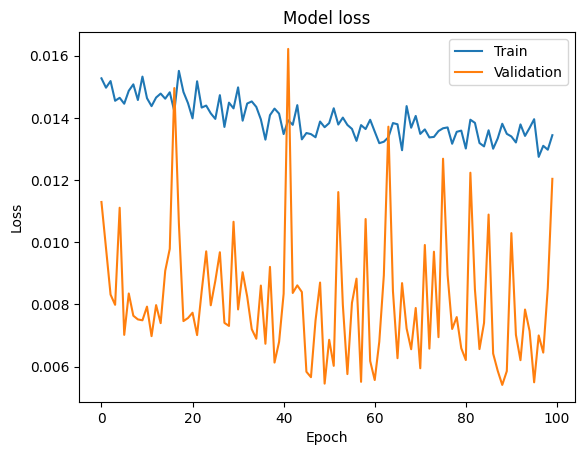

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()